In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "C:\\Users\\Dell\\Desktop\\avocado.csv5.csv"
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

###### This data set is related to avocado.  Within this we have to predict the price of avocado.  Along with this we also have to predict the region in it. 
###### There are 18249 rows and 14 columns inside it
###### There is no null values present here.

In [6]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: Unnamed: 0 ==== 53
Column: Date ==== 169
Column: AveragePrice ==== 259
Column: Total Volume ==== 18237
Column: 4046 ==== 17702
Column: 4225 ==== 18103
Column: 4770 ==== 12071
Column: Total Bags ==== 18097
Column: Small Bags ==== 17321
Column: Large Bags ==== 15082
Column: XLarge Bags ==== 5588
Column: type ==== 2
Column: year ==== 4
Column: region ==== 54


In [7]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

###### Here the three columns contain the object data type. First date, second type, third region. Because the format of date column is not datetime64,  So it is coming in object format. But we will not change this date into datetime format because this column is not useful for our prediction.
###### We will encode the Type and Region columns. Both the type and  region columns contain categorical data. So we will use OrdinalEncoder.


In [8]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['type','region']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])
    
data.head


<bound method NDFrame.head of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1               1  20-12-2015          1.35      54876.98   674.28   44638.81   
2               2  13-12-2015          0.93     118220.22   794.70  109149.67   
3               3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4               4  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  04-02-2018          1.63      17074.83  2046.96    1529.20   
18245           8  28-01-2018          1.71      13888.04  1191.70    3431.50   
18246           9  21-01-2018          1.87      13766.76  1191.92    2452.79   
18247          10  14-01-2018          1.93      16205.22  1527.63    2981.04   
18248          11  07-01-2018          1.62      17489.58  2894.77    2356.13  

In [9]:
data = data.drop(columns=['Unnamed: 0','Date'])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0


In [10]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


###### I feel all columns have skewness and outliers. So we will use more techniques to detect skewness and outliers. First of all we will create a box plot to find outliers. After that we will look at the skewness of the data.

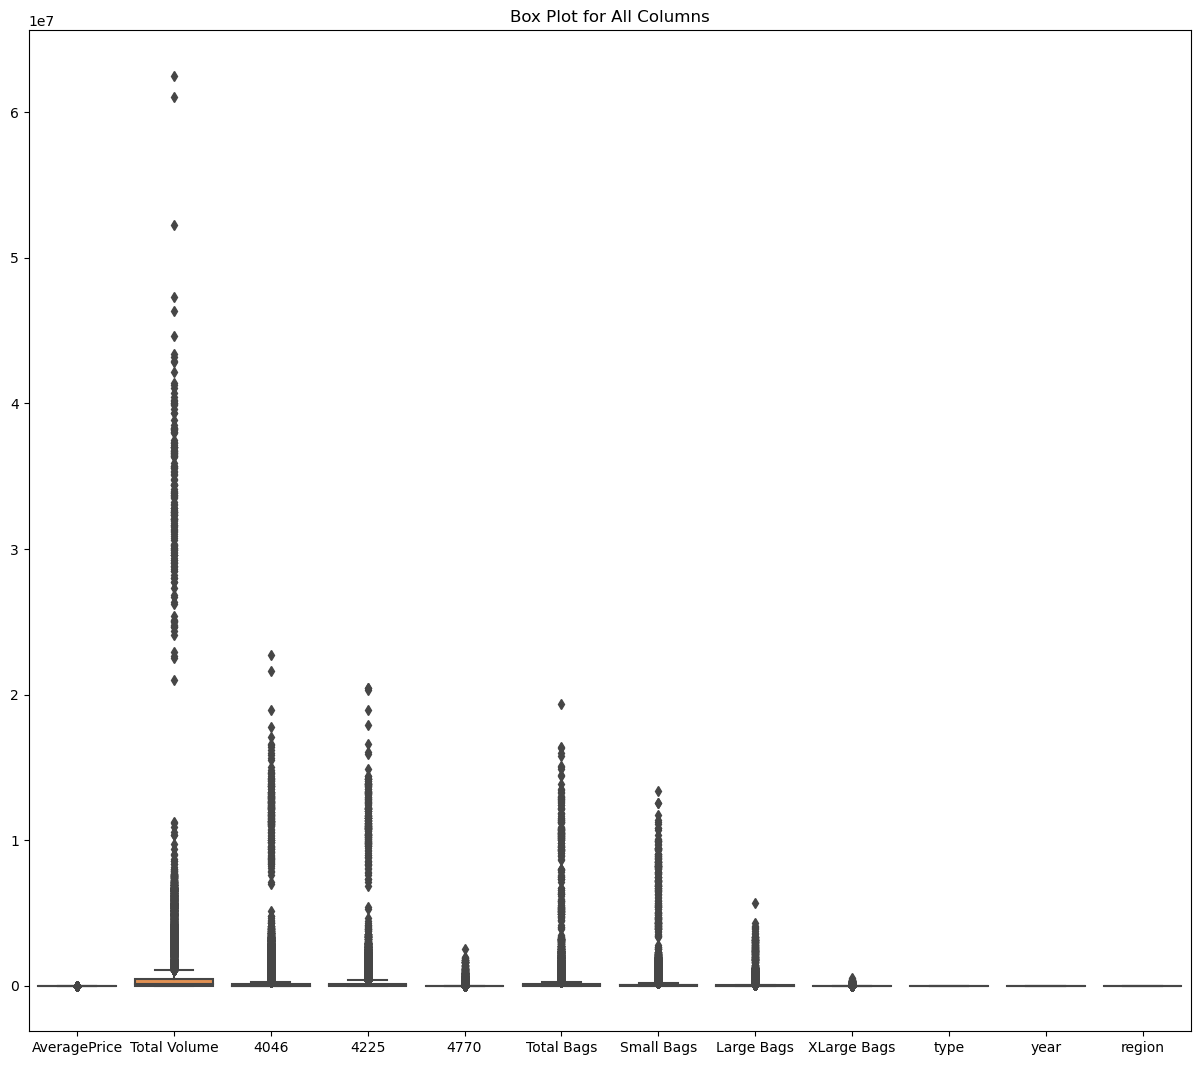

In [11]:
plt.figure(figsize=(15, 13))
sns.boxplot(data=data)
plt.title('Box Plot for All Columns')
plt.show()

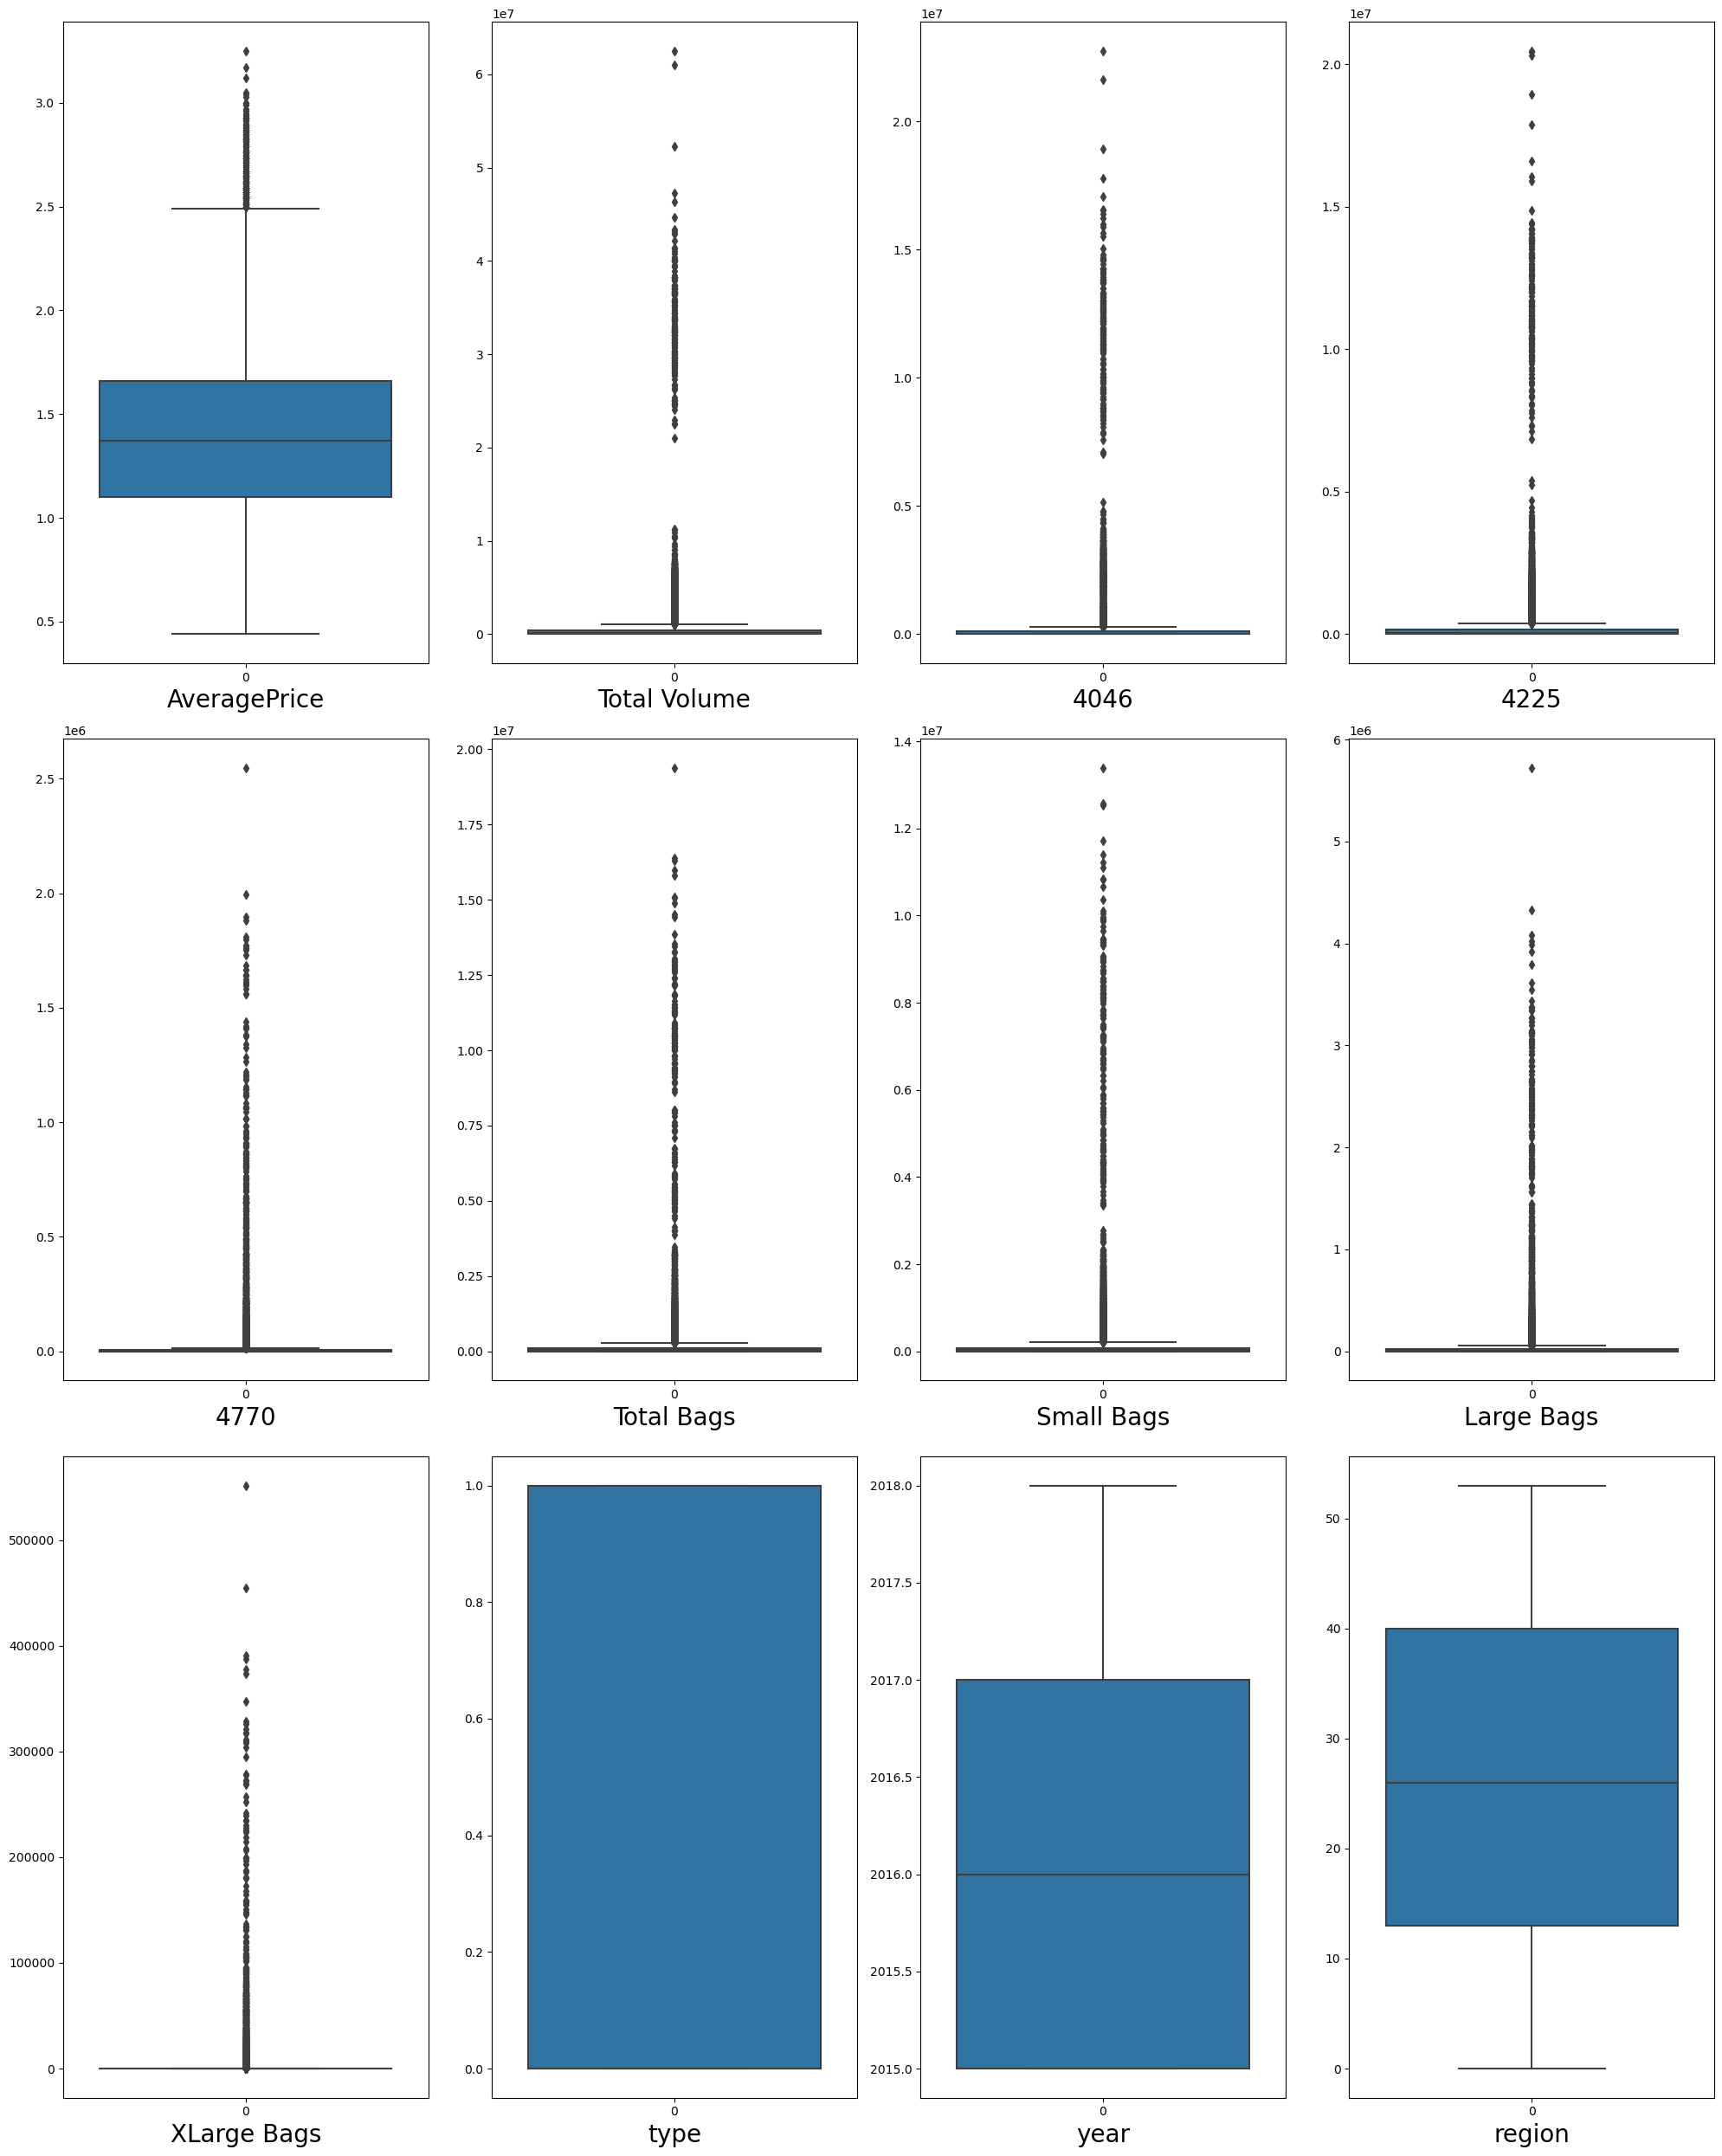

In [12]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data.columns:
    if graph <= 12:
        plt.subplot(3, 4, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

###### All columns except Type, Year and Region columns have a higher side out layer. The largest number of outliers is inside the Total Volume column, so we remove the outliers from it and see how many outliers are eliminated across all the columns.

In [13]:
data_copy = data.copy(deep=True)

In [14]:
#Find the IQR to identify outliers

# 1st quantile
q1 = data_copy.quantile(0.25)

#3rd quantile 
q3 = data_copy.quantile(0.75)

#IQR
iqr = q3 - q1

### Removed higher side outliers

In [15]:
tv_high = (q3['Total Volume'] + (1.5* iqr['Total Volume']))
print(tv_high)

tv_index= np.where(data_copy['Total Volume']> tv_high) 
print (tv_index)

data_copy = data_copy.drop(data_copy.index[tv_index])
print (data_copy.shape ) 

data_copy.reset_index()

1066147.855
(array([  312,   313,   314, ..., 18222, 18223, 18224], dtype=int64),)
(15952, 12)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
15948,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
15949,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
15950,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


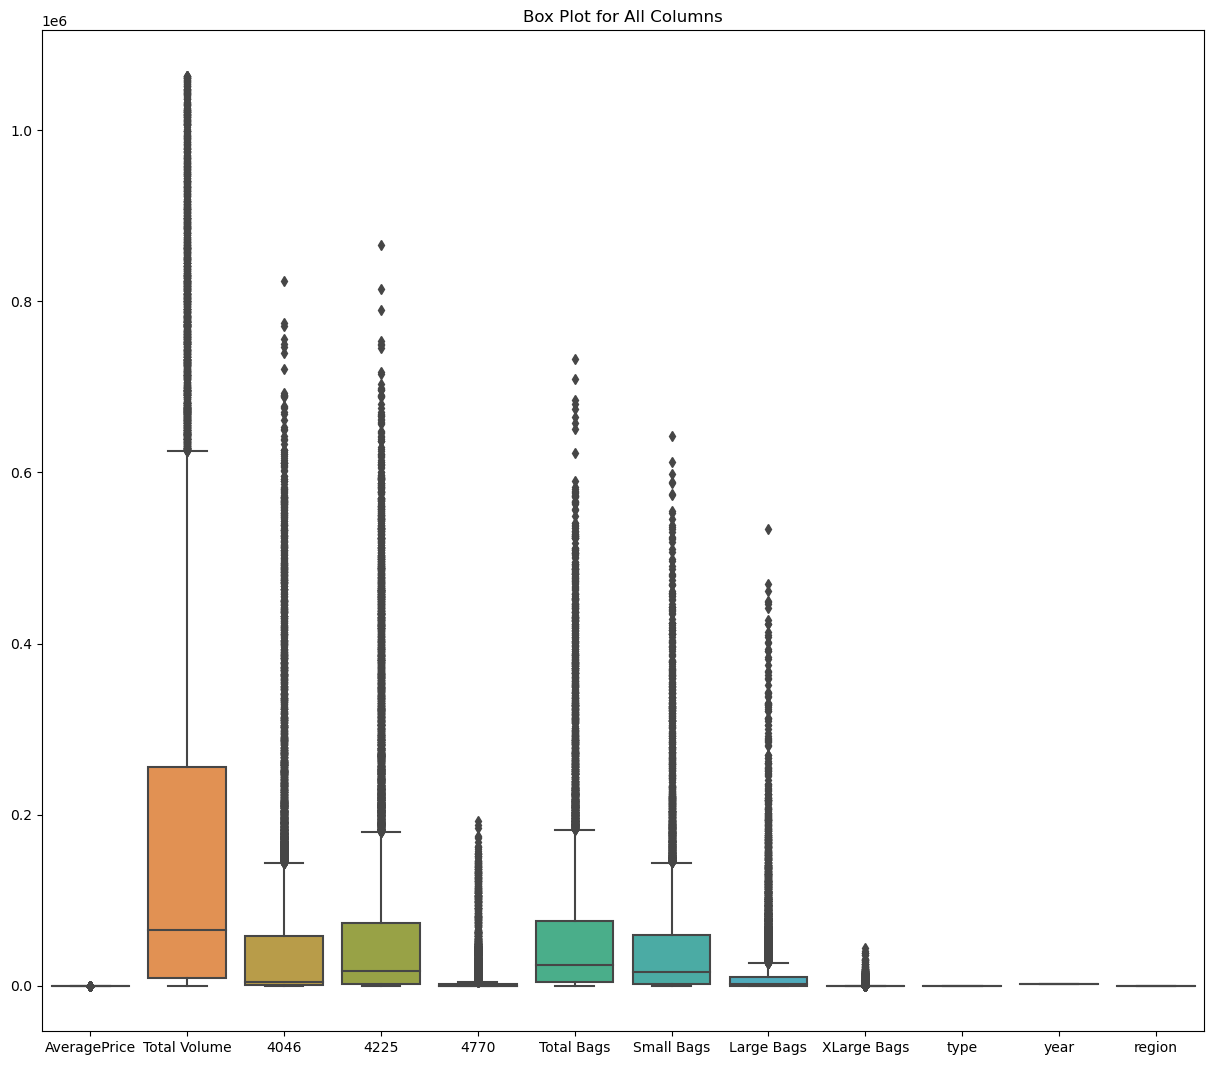

In [16]:
plt.figure(figsize=(15, 13))
sns.boxplot(data=data_copy)
plt.title('Box Plot for All Columns')
plt.show()

###### The graph has become better than before, so now we will see more columns by removing outliers.

In [17]:
aa_high = (q3['4770'] + (1.5* iqr['4770']))
print(aa_high)

aa_index= np.where(data_copy['4770']> aa_high) 
print (aa_index)

data_copy = data_copy.drop(data_copy.index[aa_index])
print (data_copy.shape ) 

data_copy.reset_index()

15608.550000000001
(array([  104,   105,   106, ...,  8223,  9575, 12478], dtype=int64),)
(14546, 12)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
14542,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
14543,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
14544,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [18]:
ab_high = (q3['4225'] + (1.5* iqr['4225']))
print(ab_high)

ab_index= np.where(data_copy['4225']> ab_high) 
print (ab_index)

data_copy = data_copy.drop(data_copy.index[ab_index])
print (data_copy.shape ) 

data_copy.reset_index()

371003.98
(array([  157,   158,   159,   161,   162,   163,   164,   165,   166,
         167,   168,   169,   170,   171,   172,   173,   174,   175,
         176,   177,   178,   179,   180,   181,   182,   183,   184,
         185,   186,   187,   188,   189,   190,   192,   199,   202,
         203,   207,   325,   331,   334,   335,   336,   337,   338,
         339,   340,   341,   342,   343,   344,   345,   346,   347,
         348,   349,   350,   351,   352,   353,   354,   355,   356,
         499,   501,   503,   512,   513,   514,   518,   519,   520,
         872,   873,   874,   875,   876,   884,   890,   893,   897,
         900,   907,   909,   915,   988,   990,  1013,  1014,  1027,
        1038,  1252,  1265,  1296,  1297,  1298,  1299,  1345,  1584,
        1713,  1714,  1718,  1719,  1720,  1721,  1774,  1775,  1776,
        1788,  1789,  1790,  1798,  2103,  2481,  2482,  2483,  2484,
        2485,  2486,  2487,  2488,  2489,  2490,  2491,  2492,  2496,
        2

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14224,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
14225,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
14226,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
14227,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [19]:
ac_high = (q3['4046'] + (1.5* iqr['4046']))
print(ac_high)

ac_index= np.where(data_copy['4046']> ac_high) 
print (ac_index)

data_copy = data_copy.drop(data_copy.index[ac_index])
print (data_copy.shape ) 

data_copy.reset_index()

276269.39499999996
(array([  52,   54,   55,   60,   66,   67,   68,   71,   72,   73,   74,
         75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
         86,   87,   88,   89,   90,   91,   92,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  287,  288,  289,  290,
        291,  436,  437,  438,  439,  440,  441,  442,  443,  444,  445,
        446,  447,  448,  647,  649,  651,  652,  655,  658,  659,  661,
        663,  667,  670,  672,  674,  676,  677,  678,  679,  680,  681,
        682,  683,  684,  685,  687,  690,  694,  695,  696,  698,  874,
        877,  890,  942,  943,  944,  945,  946,  947,  948,  949,  950,
        951,  952,  953,  954,  955,  956,  957,  958,  959,  960, 1178,
       1181, 1182, 1183, 1184, 1186, 1187, 1188, 1194, 1195, 1196, 1197,
       1201, 1452, 1456, 1458, 1461, 1464, 1467, 1474, 1479, 1480, 1481,
       1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492,
       1493, 1494, 1495, 1496, 

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13750,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
13751,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
13752,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
13753,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [20]:
tb_high = (q3['Total Bags'] + (1.5* iqr['Total Bags']))
print(tb_high)

tb_index= np.where(data_copy['Total Bags']> tb_high) 
print (tb_index)

data_copy = data_copy.drop(data_copy.index[tb_index])
print (data_copy.shape ) 

data_copy.reset_index()

269325.46499999997
(array([  906,  1084,  1087,  1423,  1425,  1426,  1642,  1643,  1644,
        1645,  1647,  1648,  1649,  1650,  1652,  1653,  1654,  1655,
        1656,  2011,  2250,  2303,  2304,  2305,  2306,  2311,  2312,
        2313,  2314,  2315,  2316,  2317,  2318,  2319,  2320,  2321,
        2484,  2485,  2491,  2492,  2493,  2494,  2495,  2496,  2497,
        2498,  2499,  2500,  2501,  2502,  2503,  2504,  2505,  2506,
        2507,  2508,  2509,  2510,  2511,  2512,  2513,  2514,  2515,
        2516,  2517,  2518,  2519,  2520,  2521,  2522,  2523,  2524,
        2525,  2526,  2527,  2528,  2529,  2530,  2531,  2532,  3073,
        3078,  3150,  3151,  3152,  3153,  3154,  3156,  3157,  3158,
        3159,  3166,  3167,  3168,  3169,  3171,  3172,  3173,  3174,
        3175,  3176,  3177,  3178,  3822,  3825,  3826,  3835,  3840,
        3841,  3842,  3843,  4080,  4094,  4101,  4102,  4103,  4104,
        4105,  4106,  4107,  4108,  4109,  4110,  4111,  4112,  4113,


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13534,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
13535,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
13536,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
13537,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [21]:
sb_high = (q3['Small Bags'] + (1.5* iqr['Small Bags']))
print(sb_high)

sb_index= np.where(data_copy['Small Bags']> sb_high) 
print (sb_index)

data_copy = data_copy.drop(data_copy.index[sb_index])
print (data_copy.shape ) 

data_copy.reset_index()

204070.04499999998
(array([ 1089,  1494,  2220,  2282,  2283,  2284,  2285,  2446,  2447,
        2448,  2449,  2450,  2451,  2452,  2574,  2575,  3080,  3085,
        3088,  3659,  3946,  3972,  4282,  4288,  4454, 11648, 11649,
       11650, 11651, 11653, 13216, 13259, 13261, 13262], dtype=int64),)
(13505, 12)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
13501,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
13502,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
13503,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [22]:
lb_high = (q3['Large Bags'] + (1.5* iqr['Large Bags']))
print(lb_high)

lb_index= np.where(data_copy['Large Bags']> lb_high) 
print (lb_index)

data_copy = data_copy.drop(data_copy.index[lb_index])
print (data_copy.shape ) 

data_copy.reset_index()

54881.92
(array([  184,   247,   248,  1312,  1313,  1315,  1317,  1398,  1399,
        1400,  1401,  1402,  1403,  1404,  1405,  1406,  1407,  1408,
        1409,  1410,  1411,  1412,  1413,  1414,  1415,  1416,  1417,
        1419,  1420,  1421,  1422,  1559,  1560,  1561,  1562,  1563,
        1564,  1565,  1566,  1567,  1568,  1569,  1570,  1571,  1572,
        1573,  1574,  1575,  1576,  1577,  1578,  1579,  1580,  1581,
        1582,  1583,  1584,  1585,  1586,  1588,  1589,  1634,  1635,
        1833,  1835,  1842,  1864,  1866,  1867,  1869,  1873,  1875,
        1878,  1884,  1885,  1886,  1887,  1888,  1892,  1893,  1894,
        1898,  1899,  1900,  1912,  1913,  1914,  1916,  1918,  1919,
        1920,  1924,  1928,  1987,  1988,  1989,  1990,  1991,  1992,
        1993,  1994,  1995,  1996,  1997,  1998,  1999,  2000,  2001,
        2008,  2009,  2010,  2011,  2012,  2141,  2142,  2144,  2146,
        2148,  2149,  2151,  2152,  2153,  2154,  2155,  2156,  2157,
        21

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12960,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
12961,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
12962,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
12963,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [23]:
xl_high = (q3['XLarge Bags'] + (1.5* iqr['XLarge Bags']))
print(xl_high)

xl_index= np.where(data_copy['XLarge Bags']> xl_high) 
print (xl_index)

data_copy = data_copy.drop(data_copy.index[xl_index])
print (data_copy.shape ) 

data_copy.reset_index()

331.25
(array([  67,   70,  182, ..., 4101, 4102, 4103], dtype=int64),)
(11747, 12)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11742,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
11743,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
11744,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
11745,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


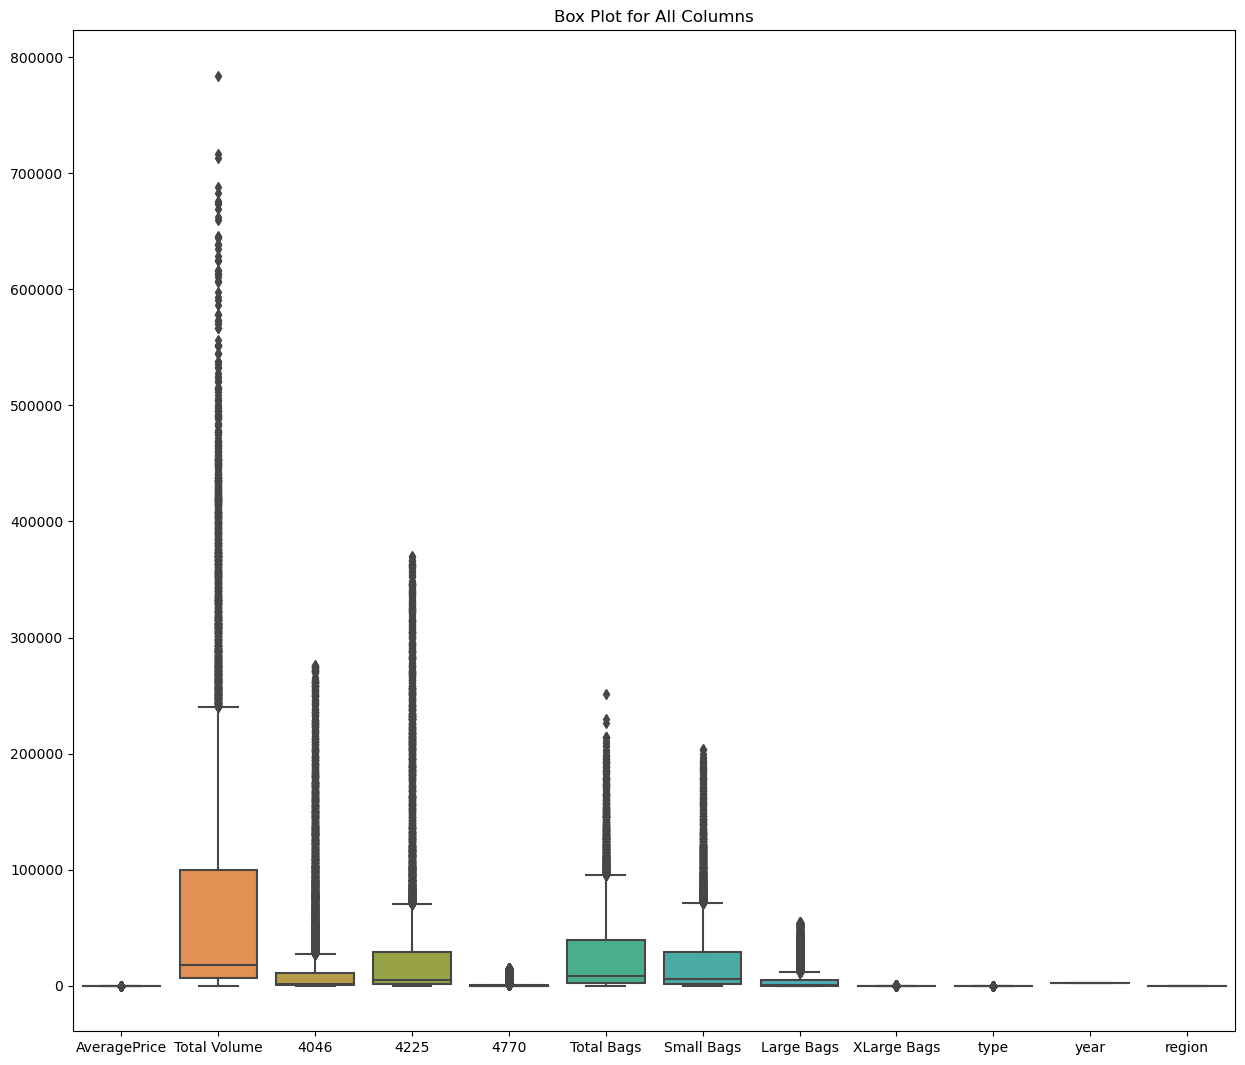

In [24]:
plt.figure(figsize=(15, 13))
sns.boxplot(data=data_copy)
plt.title('Box Plot for All Columns')
plt.show()

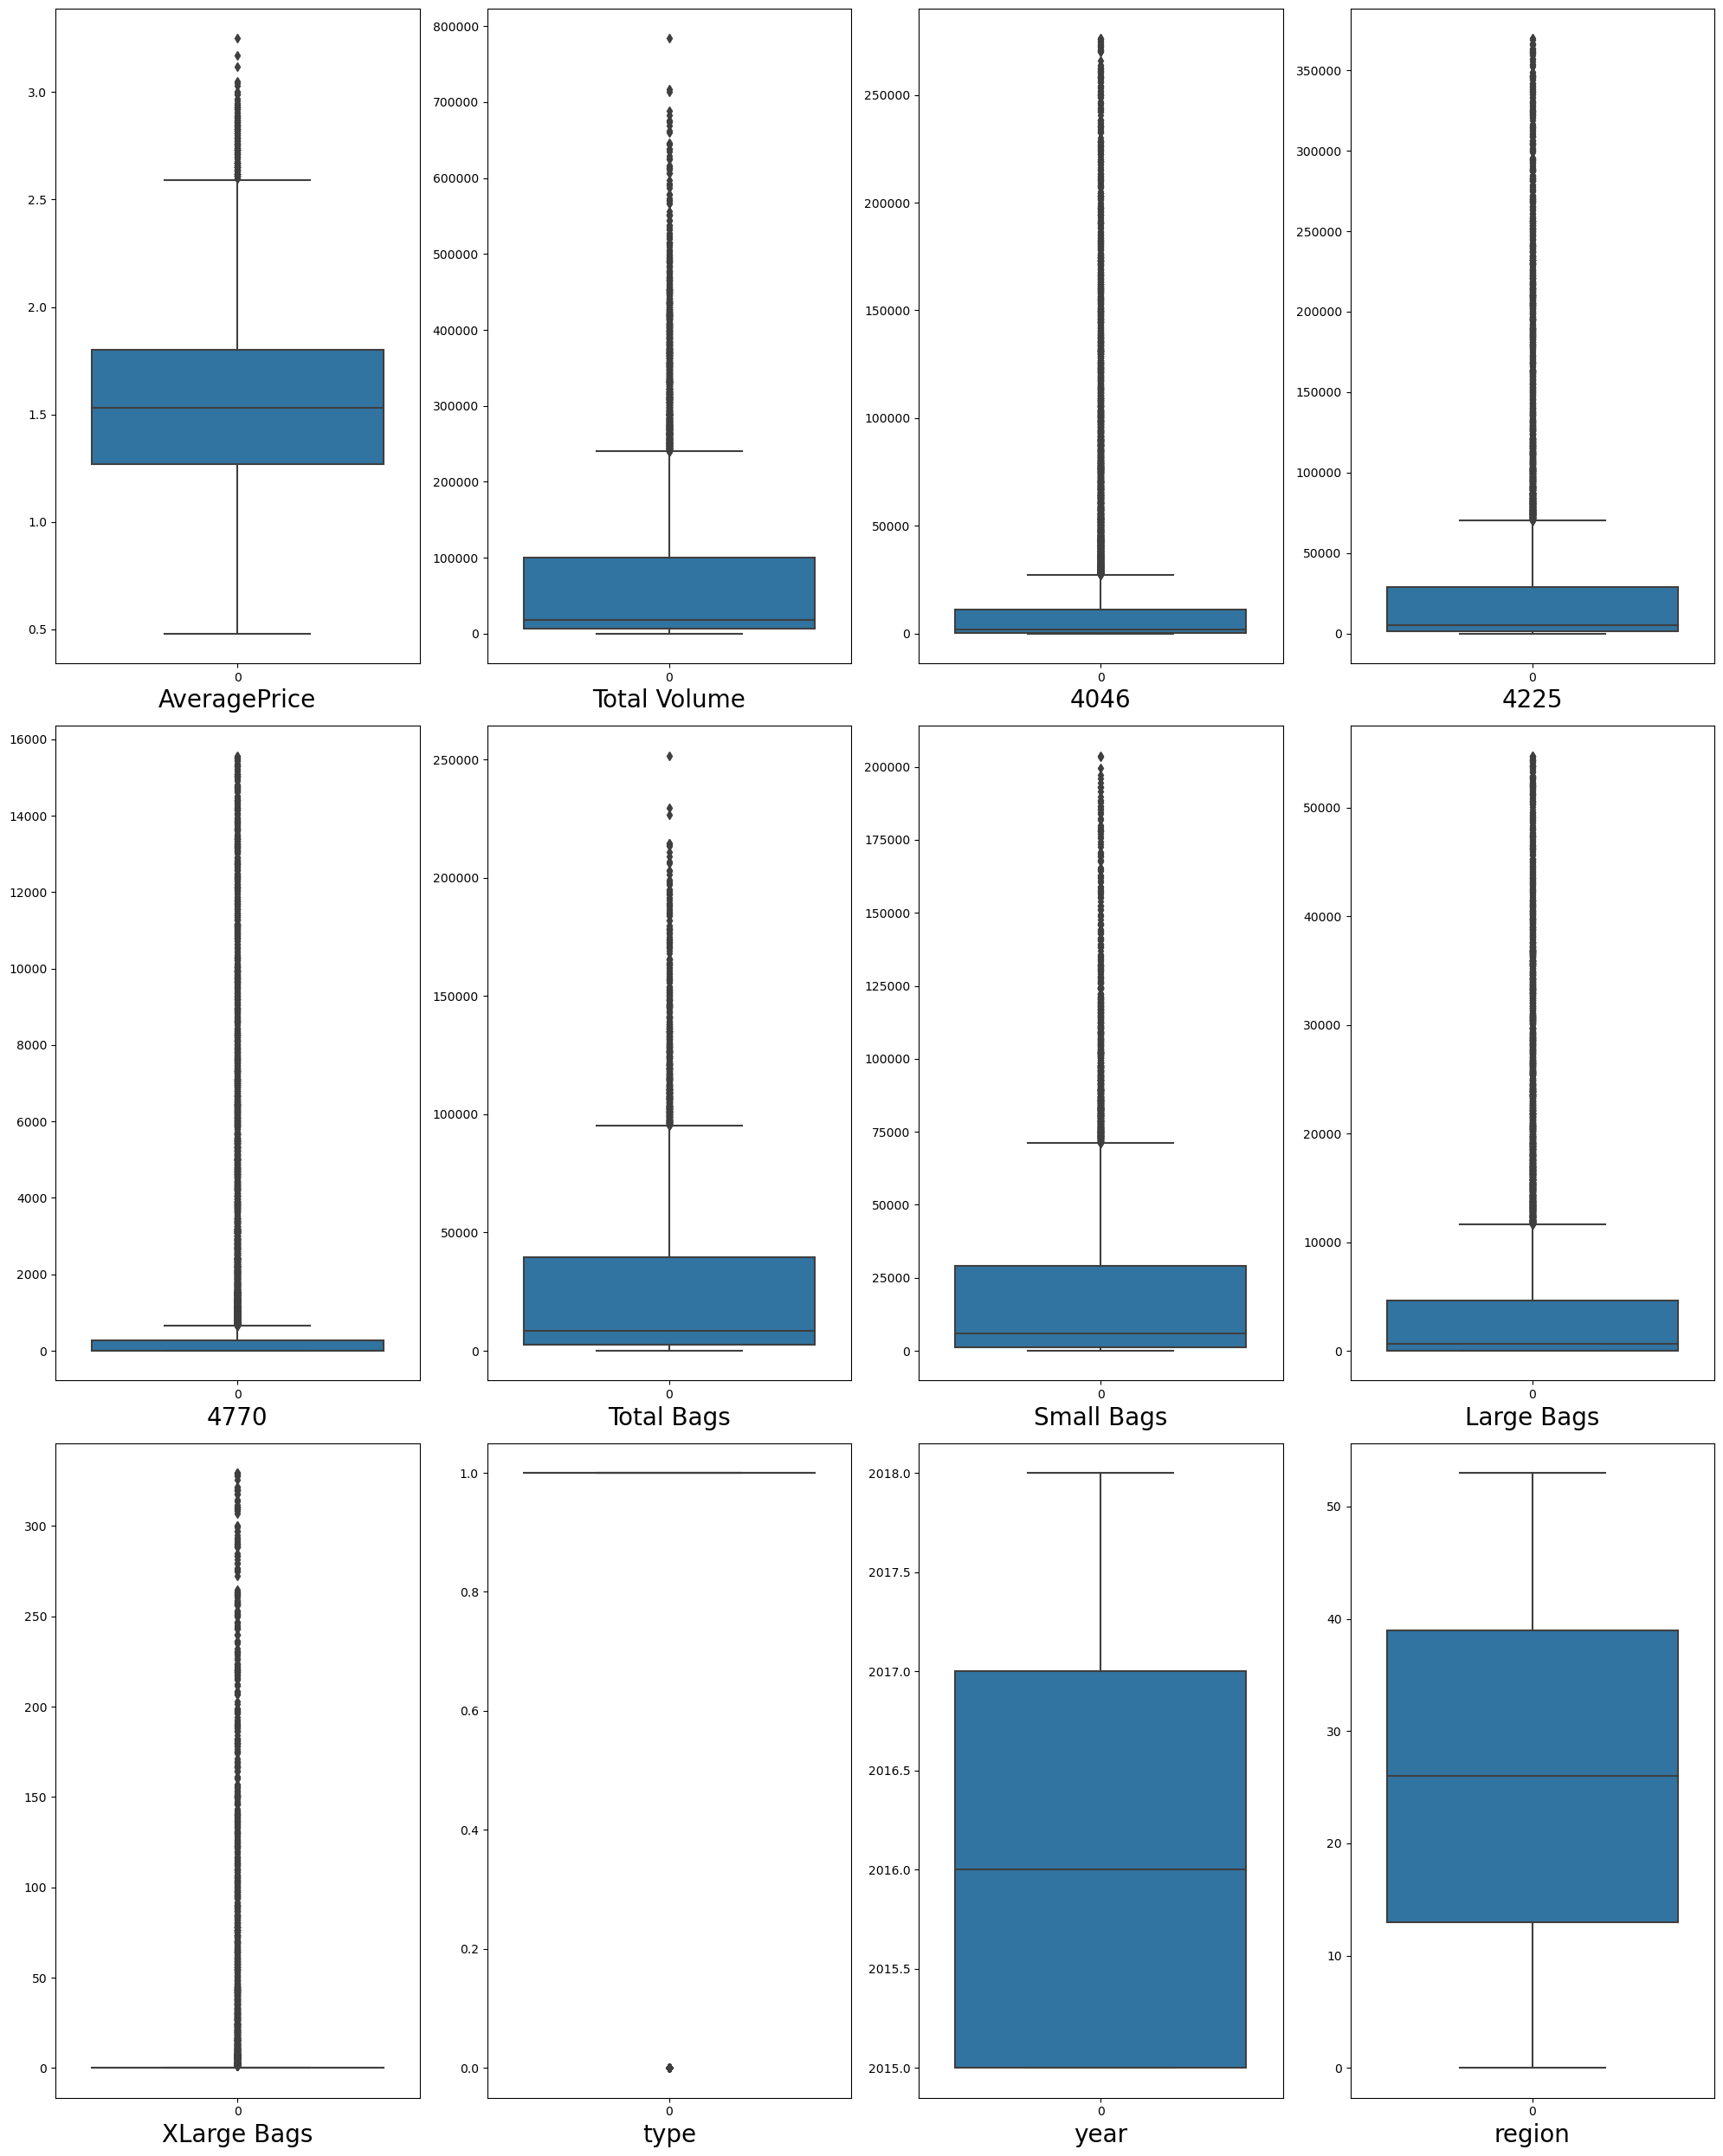

In [25]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy.columns:
    if graph <= 12:
        plt.subplot(3, 4, graph)
        ax = sns.boxplot(data=data_copy[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

###### There are still a lot of outliers, but if we remove more outliers, our data will become much smaller.

In [26]:
data_copy.skew()

AveragePrice    0.497919
Total Volume    2.115939
4046            3.256634
4225            3.346407
4770            3.815776
Total Bags      1.917330
Small Bags      2.156517
Large Bags      2.703967
XLarge Bags     6.117440
type           -1.170526
year            0.270529
region         -0.035609
dtype: float64

In [27]:
data_copy['Total Volume'] = np.cbrt(data_copy['Total Volume'])
data_copy['4046'] = np.cbrt(data_copy['4046'])
data_copy['4225'] = np.cbrt(data_copy['4225'])
data_copy['4770'] = np.cbrt(data_copy['4770'])
data_copy['Total Bags'] = np.cbrt(data_copy['Total Bags'])
data_copy['Small Bags'] = np.cbrt(data_copy['Small Bags'])
data_copy['Large Bags'] = np.cbrt(data_copy['Large Bags'])
data_copy['XLarge Bags'] = np.cbrt(data_copy['XLarge Bags'])

In [28]:
data_copy.skew()

AveragePrice    0.497919
Total Volume    0.791783
4046            1.289662
4225            1.022663
4770            1.605246
Total Bags      0.539277
Small Bags      0.576056
Large Bags      0.793000
XLarge Bags     3.586844
type           -1.170526
year            0.270529
region         -0.035609
dtype: float64

###### Let's check correlation and multicollinerity in data and data_copy 

<AxesSubplot:>

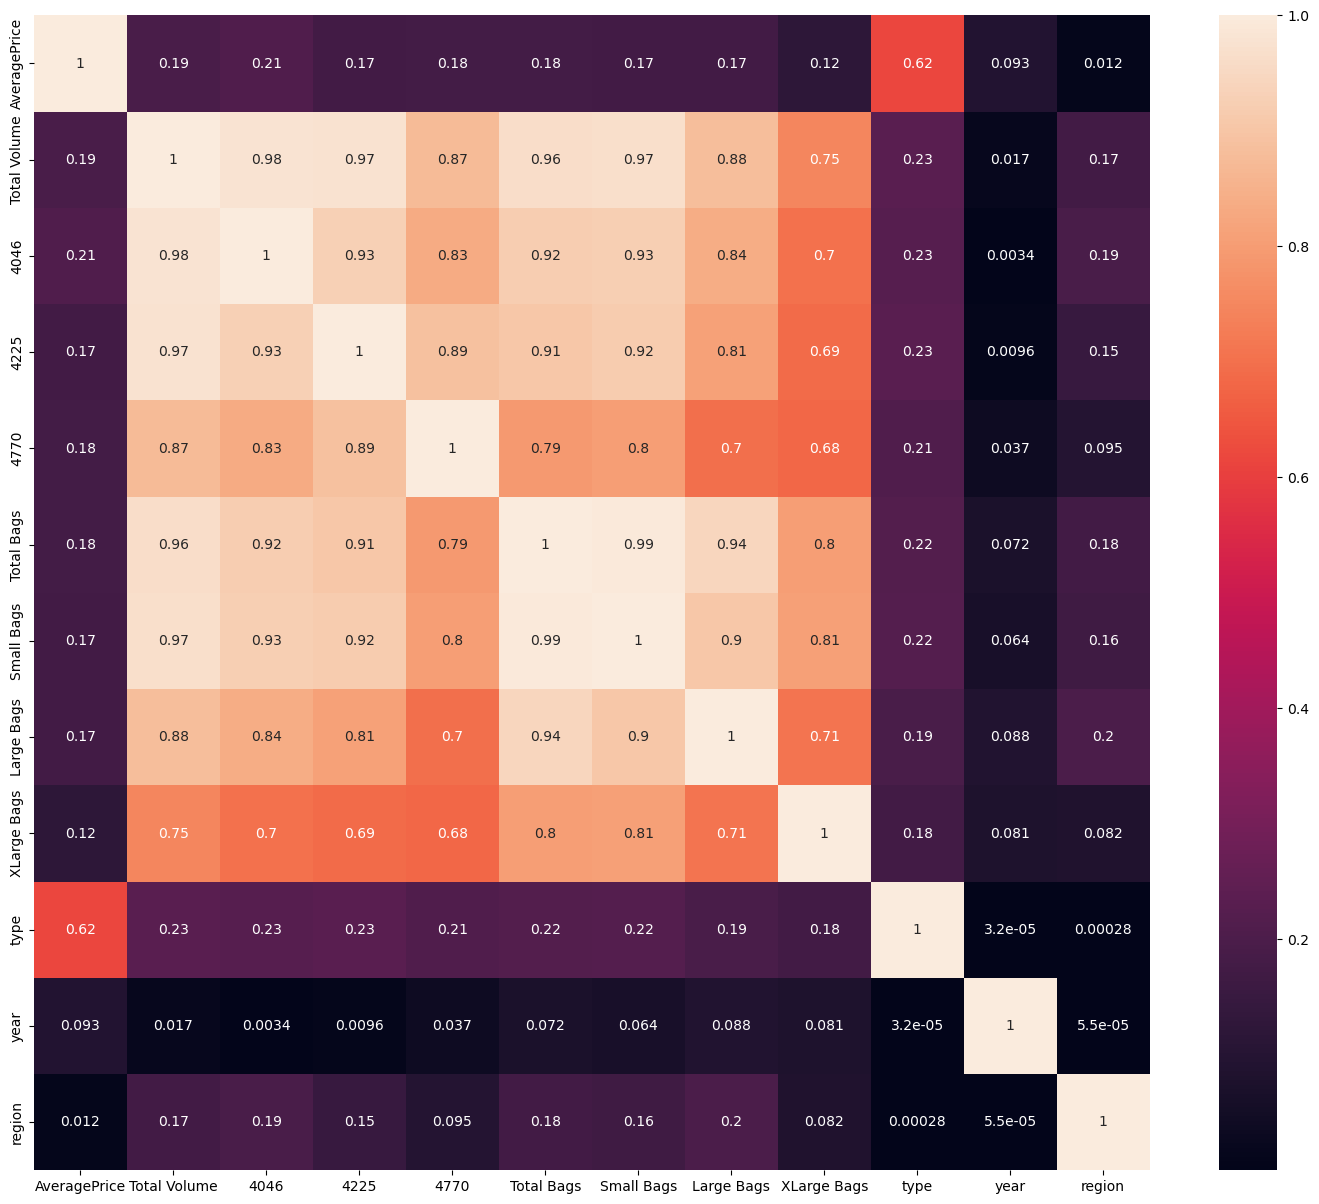

In [29]:
plt.figure(figsize=(18,15))

sns.heatmap(data.corr().abs(), annot=True)

<AxesSubplot:>

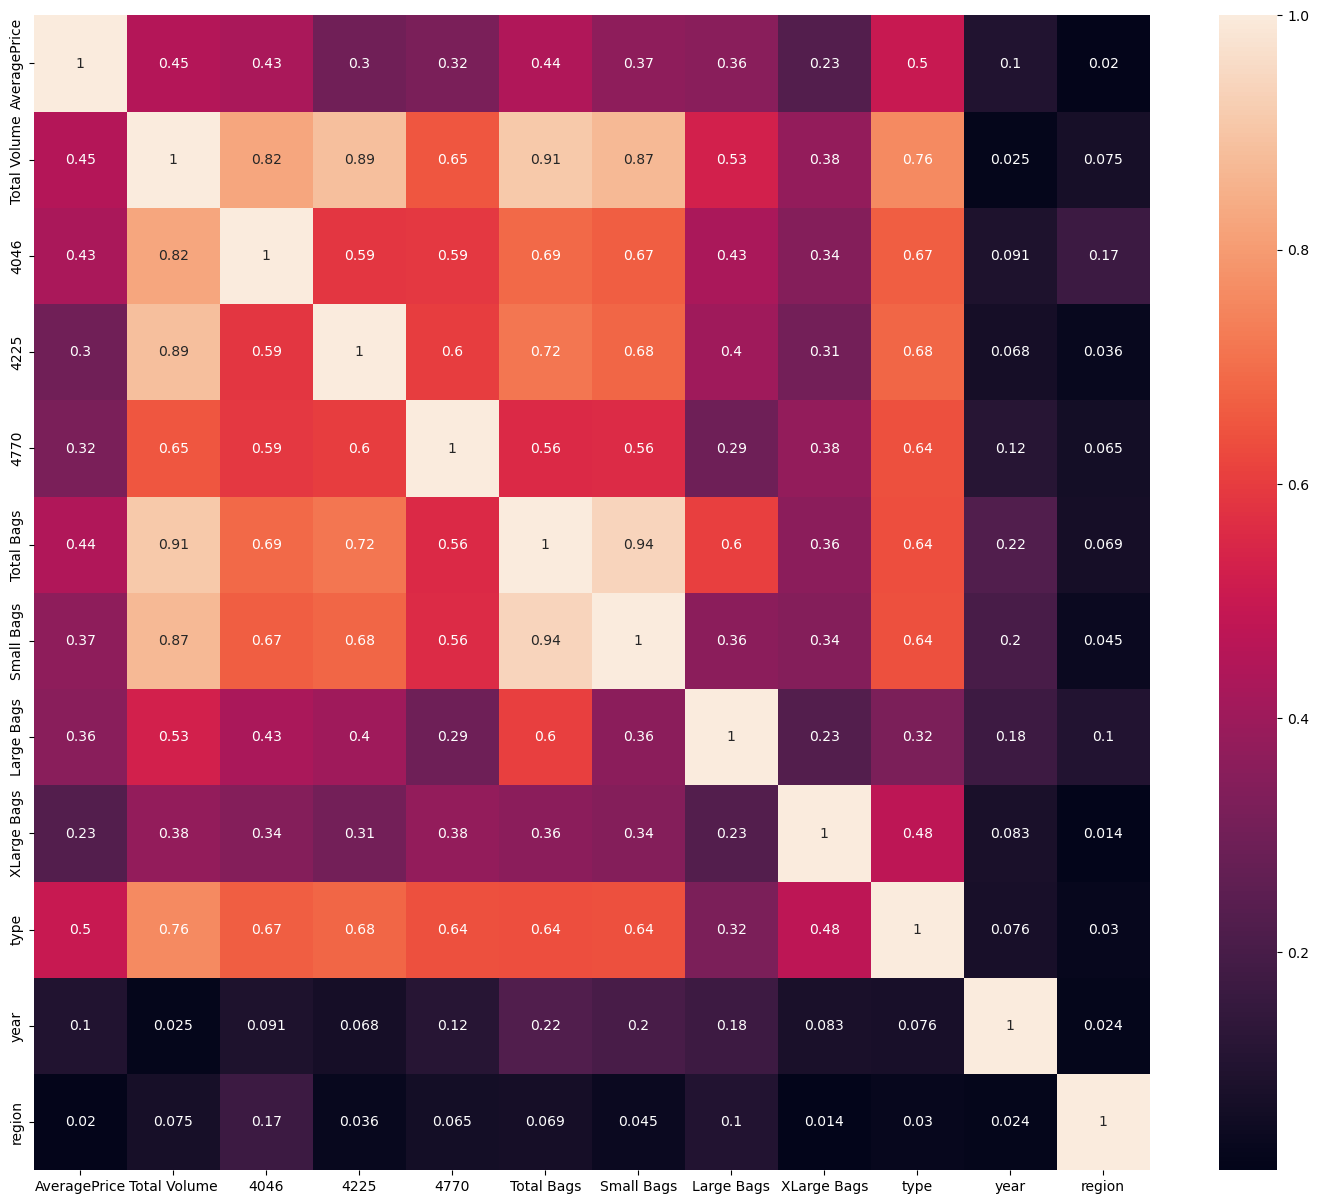

In [30]:
plt.figure(figsize=(18,15))

sns.heatmap(data_copy.corr().abs(), annot=True)

###### There is a lot of multicollinearity in the data. 
###### I would remove the Total Volume and Total Bags columns as these two are causing too much multicollinearity.  Along with this, I will also remove the year column because it is not useful for our prediction,  Also, no relation is being formed with either of its labels.

In [31]:
data_copy = data_copy.drop(columns=['Total Volume','Total Bags','year'])
data_copy.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,10.120997,37.903460,3.638275,20.490870,4.534711,0.0,0.0,0.0
1,1.35,8.768933,35.473513,3.878204,21.110581,4.602425,0.0,0.0,0.0
2,0.93,9.262632,47.790416,5.072283,20.035113,4.689671,0.0,0.0,0.0
3,1.08,10.421946,41.597133,4.171309,17.839520,5.114173,0.0,0.0,0.0
4,1.28,9.800999,35.260208,4.231732,18.157325,5.825433,0.0,0.0,0.0


<AxesSubplot:>

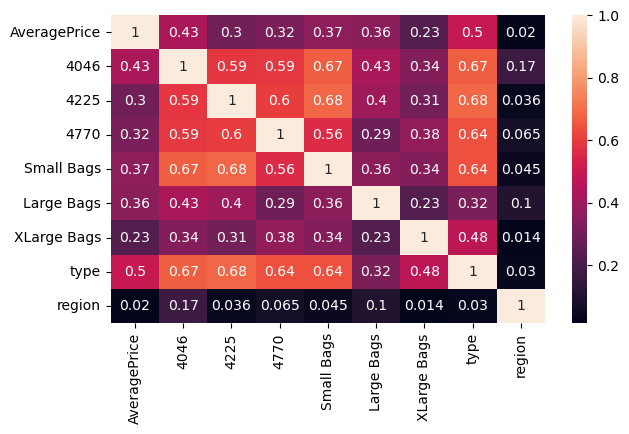

In [32]:
plt.figure(figsize=(7,4))

sns.heatmap(data_copy.corr().abs(), annot=True)

##### Now the data is looking better and we do not see multicollinearity anywhere.
##### So we create the model for average price, but before creating the model we will delete the region column because there is no relation between average price and region.

In [33]:
data_copy = data_copy.drop(columns=['region'])
data_copy.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,1.33,10.120997,37.903460,3.638275,20.490870,4.534711,0.0,0.0
1,1.35,8.768933,35.473513,3.878204,21.110581,4.602425,0.0,0.0
2,0.93,9.262632,47.790416,5.072283,20.035113,4.689671,0.0,0.0
3,1.08,10.421946,41.597133,4.171309,17.839520,5.114173,0.0,0.0
4,1.28,9.800999,35.260208,4.231732,18.157325,5.825433,0.0,0.0


In [34]:
# divide feature and label
x1 = data_copy.drop('AveragePrice',axis = 1)
y1 = data_copy['AveragePrice']

In [35]:
#Scaled the features
scalar = StandardScaler() 
x1_scaled = scalar.fit_transform(x1)

## 1st Model bulding for AveragePrice

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x1_scaled,y1, test_size= 0.25, random_state = 890)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mae = mean_absolute_error(y_train, y_pred)
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


### KNeighborsRegressor

In [39]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [40]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)        
metric_score(knn,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.12195754824063564
Mean Squared Error :  0.031596184790011354
R-squared (R2) Score :  0.7878939305041308

============Test Result================
Mean Absolute Error :  0.15998433775961868
Mean Squared Error :  0.05187013278855975
R-squared (R2) Score :  0.6541877661597026


### DecisionTreeRegressor

In [41]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
metric_score(dtr,x_train,x_test,y_train,y_test,train=True)        
metric_score(dtr,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  4.1586106484256717e-19
Mean Squared Error :  7.135340906333642e-35
R-squared (R2) Score :  1.0

============Test Result================
Mean Absolute Error :  0.21146067415730335
Mean Squared Error :  0.09748198842356147
R-squared (R2) Score :  0.35009874924822193


### AdaBoostRegressor

In [43]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [44]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)        
metric_score(ada,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.25207293825091964
Mean Squared Error :  0.10026709970681345
R-squared (R2) Score :  0.32690416390760135

============Test Result================
Mean Absolute Error :  0.254780636963885
Mean Squared Error :  0.10265120139419898
R-squared (R2) Score :  0.31563619848014957


### LinearRegression

In [45]:
lin= LinearRegression() 
lin.fit(x_train, y_train)

LinearRegression()

In [46]:
metric_score(lin,x_train,x_test,y_train,y_test,train=True)        
metric_score(lin,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.24524897314716654
Mean Squared Error :  0.10177502145688562
R-squared (R2) Score :  0.316781443153789

============Test Result================
Mean Absolute Error :  0.24604342820380712
Mean Squared Error :  0.10252379219949205
R-squared (R2) Score :  0.3164856209871827


##### The result of knn model is good in this, but I will try to get better results in other ways. So I will copy the data for this into another variable.

In [47]:
data_copy1 = data.copy(deep=True)

<AxesSubplot:>

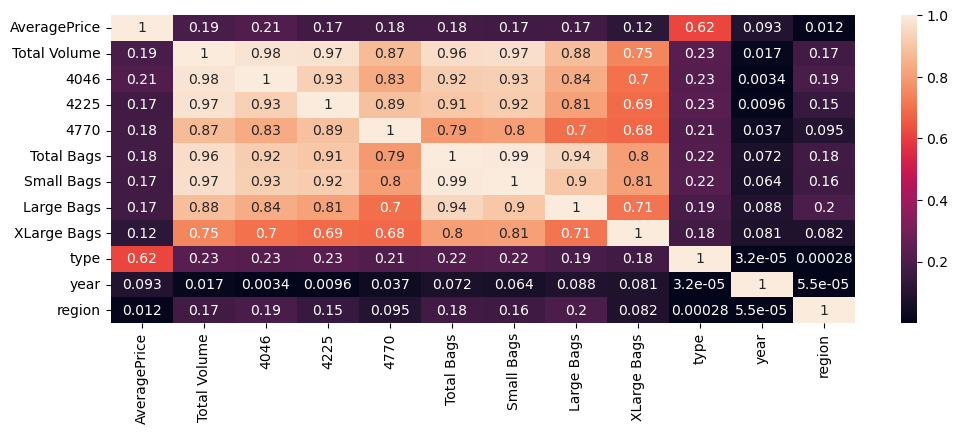

In [48]:
plt.figure(figsize=(12,4))

sns.heatmap(data_copy1.corr().abs(), annot=True)

###### there is too much multicollinearity between size and begs of avocado, So we will remove both size and begs. and also remove year because it is not useful for our prediction

In [49]:
data_copy1 = data_copy1.drop(columns=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags','year'])
data_copy1.head()

,AveragePrice,Total Volume,Total Bags,type,region
0,1.33,64236.62,8696.87,0.0,0.0
1,1.35,54876.98,9505.56,0.0,0.0
2,0.93,118220.22,8145.35,0.0,0.0
3,1.08,78992.15,5811.16,0.0,0.0
4,1.28,51039.60,6183.95,0.0,0.0


<AxesSubplot:>

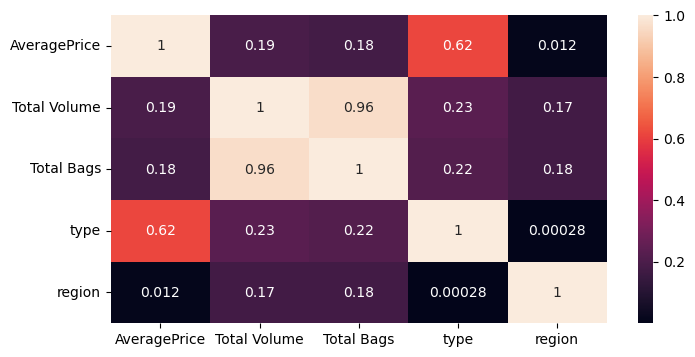

In [50]:
plt.figure(figsize=(8,4))

sns.heatmap(data_copy1.corr().abs(), annot=True)

###### There is still multicollinearity within Total Volume and Total Bags. So we will remove total begs because its correlation with average price has less to do with total volume. also we will remove region column because no correlation with average price.

In [51]:
data_copy1 = data_copy1.drop(columns=['Total Bags','region'])
data_copy1.head()

,AveragePrice,Total Volume,type
0,1.33,64236.62,0.0
1,1.35,54876.98,0.0
2,0.93,118220.22,0.0
3,1.08,78992.15,0.0
4,1.28,51039.60,0.0


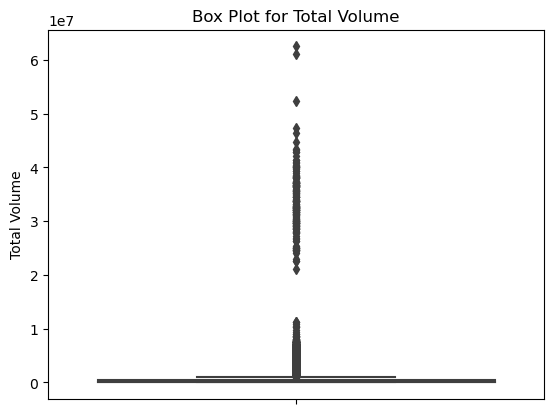

In [52]:
plt.figure()
sns.boxplot(y=data_copy1['Total Volume'])
plt.title('Box Plot for Total Volume')
plt.show()

In [53]:
#Find the IQR to identify outliers
q1 = data_copy1.quantile(0.25) 
q3 = data_copy1.quantile(0.75)
iqr1 = q3 - q1

In [54]:
tv1_high = (q3['Total Volume'] + (1.5* iqr1['Total Volume']))
print(tv1_high)

tv1_index= np.where(data_copy1['Total Volume']> tv1_high) 
print (tv1_index)

data_copy1 = data_copy1.drop(data_copy1.index[tv1_index])
print (data_copy1.shape ) 

data_copy1.reset_index()

1066147.855
(array([  312,   313,   314, ..., 18222, 18223, 18224], dtype=int64),)
(15952, 3)


,index,AveragePrice,Total Volume,type
0,0,1.33,64236.62,0.0
1,1,1.35,54876.98,0.0
2,2,0.93,118220.22,0.0
3,3,1.08,78992.15,0.0
4,4,1.28,51039.60,0.0
...,...,...,...,...
15947,18244,1.63,17074.83,1.0
15948,18245,1.71,13888.04,1.0
15949,18246,1.87,13766.76,1.0
15950,18247,1.93,16205.22,1.0


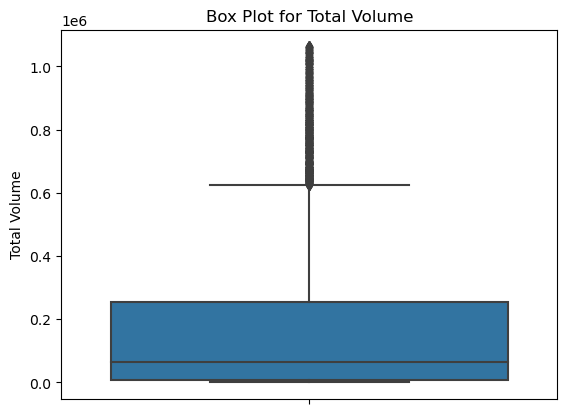

In [55]:
plt.figure()
sns.boxplot(y=data_copy1['Total Volume'])
plt.title('Box Plot for Total Volume')
plt.show()

##### Now this is better

In [56]:
data_copy1.skew()

AveragePrice    0.576045
Total Volume    1.682052
type           -0.274645
dtype: float64

In [57]:
data_copy1['Total Volume'] = np.cbrt(data_copy1['Total Volume'])

In [58]:
data_copy1.skew()

AveragePrice    0.576045
Total Volume    0.483181
type           -0.274645
dtype: float64

In [59]:
# divide feature and label
x2 = data_copy1.drop('AveragePrice',axis = 1)
y2 = data_copy1['AveragePrice']

In [60]:
#Scaled the features
scalar = StandardScaler() 
x2_scaled = scalar.fit_transform(x2)

## 2nd Model bulding for AveragePrice

In [61]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x2_scaled,y2, test_size= 0.25, random_state = 66)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score1(clf, x_train1, x_test1, y_train1, y_test1, train=True):
    if train:
        y_pred = clf.predict(x_train1)
        print("\n============Train Result================")
        mae = mean_absolute_error(y_train1, y_pred)
        mse = mean_squared_error(y_train1, y_pred)
        r2 = r2_score(y_train1, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test1)
        print("\n============Test Result================")
        mae = mean_absolute_error(y_test1, y_pred)
        mse = mean_squared_error(y_test1, y_pred)
        r2 = r2_score(y_test1, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


### KNeighborsRegressor

In [63]:
knn1= KNeighborsRegressor()
knn1.fit(x_train1, y_train1)

KNeighborsRegressor()

In [64]:
metric_score1(knn1,x_train1,x_test1,y_train1,y_test1,train=True)        
metric_score1(knn1,x_train1,x_test1,y_train1, y_test1,train=False)        


============Train Result================
Mean Absolute Error :  0.21672851889000336
Mean Squared Error :  0.07910338950183884
R-squared (R2) Score :  0.49295376090239096

============Test Result================
Mean Absolute Error :  0.26070962888666
Mean Squared Error :  0.11682582246740221
R-squared (R2) Score :  0.26055291191057106


### DecisionTreeRegressor

In [65]:
dtr1= DecisionTreeRegressor()
dtr1.fit(x_train1, y_train1)

DecisionTreeRegressor()

In [66]:
metric_score1(dtr1,x_train1,x_test1,y_train1,y_test1,train=True)        
metric_score1(dtr1,x_train1,x_test1,y_train1, y_test1,train=False)              


============Train Result================
Mean Absolute Error :  0.0003769642260113674
Mean Squared Error :  0.0001698804747576062
R-squared (R2) Score :  0.9989110800894321

============Test Result================
Mean Absolute Error :  0.3367527582748244
Mean Squared Error :  0.19646807923771312
R-squared (R2) Score :  -0.2435414194099672


### AdaBoostRegressor

In [67]:
ada1 = AdaBoostRegressor()
ada1.fit(x_train1,y_train1)

AdaBoostRegressor()

In [68]:
metric_score1(ada1,x_train1,x_test1,y_train1,y_test1,train=True)        
metric_score1(ada1,x_train1,x_test1,y_train1, y_test1,train=False)        


============Train Result================
Mean Absolute Error :  0.2520954448880212
Mean Squared Error :  0.10258150760903996
R-squared (R2) Score :  0.3424609493766716

============Test Result================
Mean Absolute Error :  0.25215769435374324
Mean Squared Error :  0.10486233732514436
R-squared (R2) Score :  0.33627559089545134


### LinearRegression

In [69]:
lin1= LinearRegression() 
lin1.fit(x_train1, y_train1)

LinearRegression()

In [70]:
metric_score1(lin1,x_train1,x_test1,y_train1,y_test1,train=True)        
metric_score1(lin1,x_train1,x_test1,y_train1, y_test1,train=False)        


============Train Result================
Mean Absolute Error :  0.24363935960184277
Mean Squared Error :  0.10043257986366211
R-squared (R2) Score :  0.35623539998173714

============Test Result================
Mean Absolute Error :  0.24280289561040064
Mean Squared Error :  0.10005955730184926
R-squared (R2) Score :  0.36667470667270674


#### If the result is not very good after predicting in this way, then we will predict in the previous way only.

##### The result of knn model of first model building was better than the all other model then we will make predictions from that.

### cross-validation

In [71]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [72]:
lasso_regressor = LassoCV(alphas=None,max_iter=12)
lasso_regressor.fit(x_train, y_train)

LassoCV(max_iter=12)

In [73]:
#best alpha parameter
alpha = lasso_regressor.alpha_
alpha

0.0001900743085792788

In [74]:
#now we have best parameter, let,s use lasso regresssion and see 
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0001900743085792788)

In [75]:
lasso_reg.score(x_test, y_test)

0.31661170565701136

###### From cv validation it seems that the model is over fitted, but the errors in our model are very less so we check it by hyper parameter tuning.


### Hyperparameter tuning:

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_g = {'n_neighbors': range(1, 21),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']
             }

In [78]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_g, cv=5, scoring='neg_mean_squared_error')

In [79]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [80]:
best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [81]:
grid_search.best_score_

-0.04731720117012691

In [82]:
knn_h = KNeighborsRegressor(metric='manhattan',n_neighbors=7,weights='distance')
knn_h.fit(x_train,y_train)


KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance')

In [83]:
# Call the function and pass dataset to check train and test score
metric_score(knn_h,x_train,x_test,y_train,y_test, train=True)       
metric_score(knn_h,x_train,x_test,y_train,y_test, train=False)       


============Train Result================
Mean Absolute Error :  0.0
Mean Squared Error :  0.0
R-squared (R2) Score :  1.0

============Test Result================
Mean Absolute Error :  0.15426897370660841
Mean Squared Error :  0.04847507443516688
R-squared (R2) Score :  0.6768222313150318


###### The result is slightly better after hyperparameter tuning, So we will use knn_h model.

In [84]:
import pickle

In [85]:
pickle.dump(knn_h,open('avocado_AveragePrice','wb'))

# Region Prediction 

In [86]:
data_copy2 = data.copy(deep=True)

In [87]:
data_copy2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0


###### We have already seen that the average price does not have a good correlation with the region, so we will delete it. Year column is also not useful for our prediction then we will delete it also. And we will delete also Total Bags, tottle volume, Because we had seen earlier that there is multicollinearity in it.

In [88]:
data_copy2 = data_copy2.drop(columns=['AveragePrice','year','Total Volume','Total Bags'])
data_copy2.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0


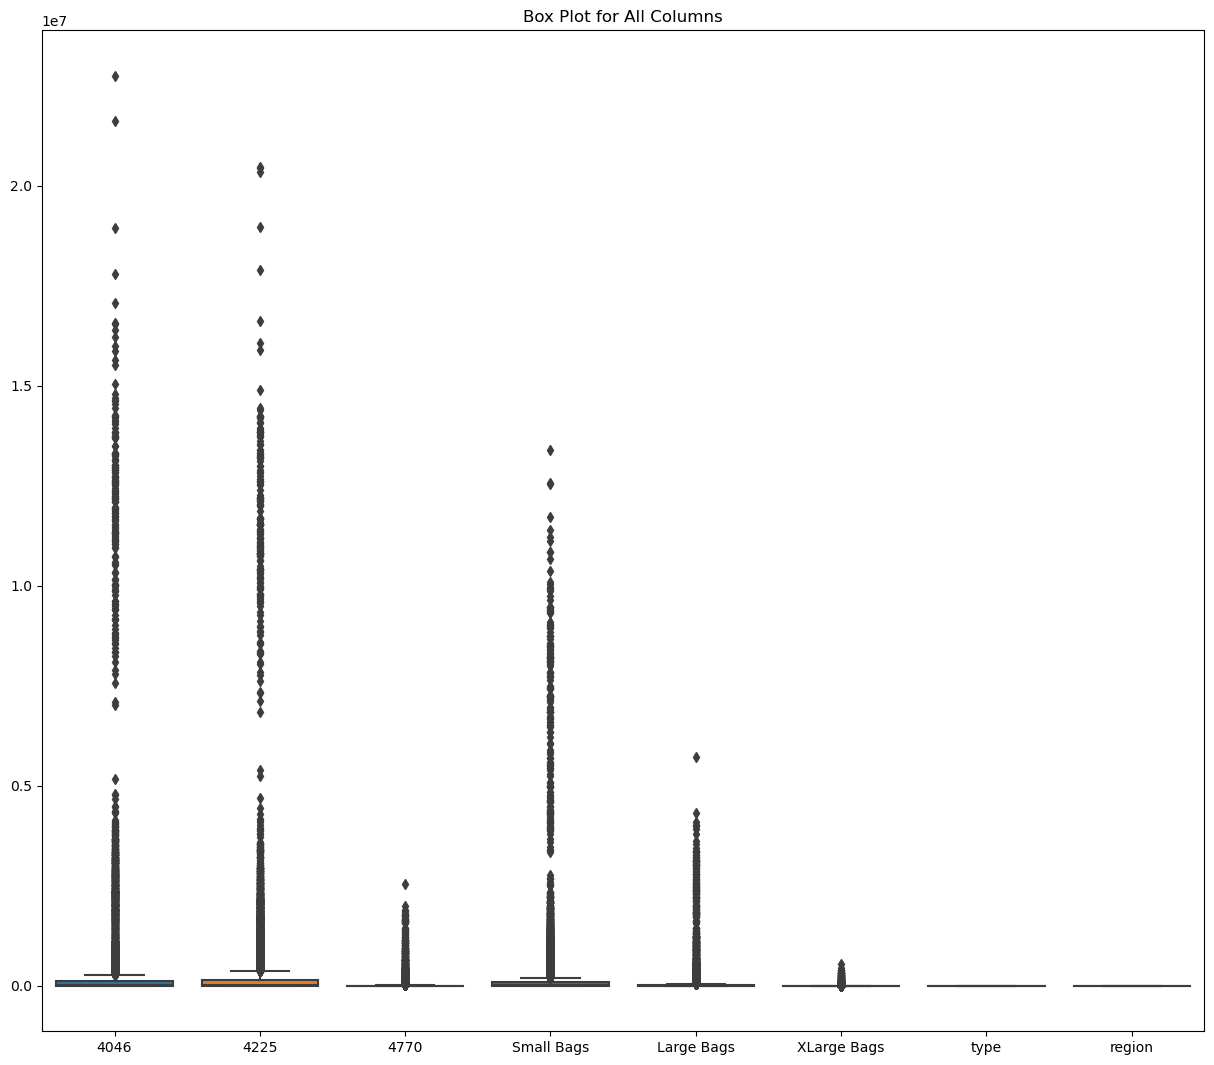

In [89]:
plt.figure(figsize=(15, 13))
sns.boxplot(data=data_copy2)
plt.title('Box Plot for All Columns')
plt.show()

### remove outliers

In [90]:
q1 = data_copy2.quantile(0.25)
q3 = data_copy2.quantile(0.75)

#IQR
iqr_2 = q3 - q1

In [91]:
a1_high = (q3['4046'] + (1.5* iqr_2['4046']))
print(a1_high)

a1_index= np.where(data_copy2['4046']> a1_high) 
print (a1_index)

data_copy2 = data_copy2.drop(data_copy2.index[a1_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

276269.39499999996
(array([   52,    54,    55, ..., 11813, 11821, 11825], dtype=int64),)
(15731, 8)


,index,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15726,18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1.0,53.0
15727,18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1.0,53.0
15728,18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1.0,53.0
15729,18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1.0,53.0


In [92]:
a2_high = (q3['4225'] + (1.5* iqr_2['4225']))
print(a2_high)

a2_index= np.where(data_copy2['4225']> a2_high) 
print (a2_index)

data_copy2 = data_copy2.drop(data_copy2.index[a2_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

371003.98
(array([   64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   107,   108,   110,
         111,   112,   113,   114,   115,   169,   170,   171,   173,
         174,   175,   176,   177,   178,   179,   180,   181,   182,
         183,   184,   185,   186,   187,   188,   189,   190,   191,
         192,   193,   194,   195,   196,   197,   198,   199,   200,
         201,   202,   204,   211,   214,   215,   219,   324,   325,
         326,   327,   328,   329,   330,   331,   332,   333,   334,
         335,   336,   337,   338,   339,   340,   341,   342,   343,
         344,   345,   346,   347,   348,   349,   350,   351,   352,
         353,   354,   355,   356,   357,   358,   359,   360,   361,
         

,index,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14761,18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1.0,53.0
14762,18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1.0,53.0
14763,18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1.0,53.0
14764,18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1.0,53.0


In [93]:
a3_high = (q3['4770'] + (1.5* iqr_2['4770']))
print(a3_high)

a3_index= np.where(data_copy2['4770']> a3_high) 
print (a3_index)

data_copy2 = data_copy2.drop(data_copy2.index[a3_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

15608.550000000001
(array([   64,    65,   184,   185,   186,   187,   188,   189,   190,
         191,   192,   193,   194,   195,   196,   197,   198,   199,
         200,   201,   202,   203,   204,   205,   206,   207,   208,
         209,   210,   211,   212,   213,   214,   215,   216,   217,
         218,   219,   220,   221,   222,   223,   224,   225,   226,
         227,   228,   229,   230,   231,   232,   233,   234,   235,
         243,   250,   251,   255,   276,   279,   283,   289,   291,
         292,   293,   295,   296,   297,   298,   299,   300,   301,
         302,   303,   304,   305,   306,   307,   308,   309,   311,
         312,   313,   315,   316,   317,   320,   322,   323,   324,
         328,   331,   335,   340,   341,   342,   344,   346,   347,
         348,   349,   350,   351,   352,   353,   354,   355,   356,
         357,   358,   359,   360,   361,   362,   363,   364,   365,
         366,   367,   368,   369,   370,   371,   372,   373,   374,


,index,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13793,18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1.0,53.0
13794,18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1.0,53.0
13795,18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1.0,53.0
13796,18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1.0,53.0


In [94]:
sb_high = (q3['Small Bags'] + (1.5* iqr_2['Small Bags']))
print(sb_high)

sb_index= np.where(data_copy2['Small Bags']> sb_high) 
print (sb_index)

data_copy2 = data_copy2.drop(data_copy2.index[sb_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

204070.04499999998
(array([  906,  1084,  1087,  1092,  1500,  1642,  1643,  1644,  2240,
        2303,  2304,  2305,  2306,  2307,  2308,  2309,  2310,  2311,
        2312,  2313,  2314,  2315,  2316,  2317,  2318,  2319,  2320,
        2321,  2482,  2483,  2484,  2485,  2486,  2487,  2488,  2489,
        2490,  2491,  2492,  2493,  2494,  2495,  2496,  2497,  2498,
        2499,  2500,  2501,  2502,  2503,  2504,  2505,  2506,  2507,
        2508,  2509,  2510,  2511,  2512,  2513,  2514,  2515,  2516,
        2517,  2518,  2519,  2520,  2521,  2522,  2523,  2524,  2525,
        2526,  2527,  2528,  2529,  2530,  2531,  2532,  2654,  2655,
        3174,  3176,  3177,  3178,  3183,  3188,  3191,  3762,  3822,
        3825,  3826,  3835,  3840,  3841,  3842,  3843,  3844,  4058,
        4081,  4085,  4095,  4102,  4103,  4104,  4105,  4106,  4107,
        4108,  4109,  4110,  4111,  4112,  4113,  4114,  4115,  4116,
        4117,  4118,  4119,  4120,  4121,  4122,  4123,  4124,  4125,


,index,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13564,18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1.0,53.0
13565,18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1.0,53.0
13566,18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1.0,53.0
13567,18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1.0,53.0


In [95]:
lb_high = (q3['Large Bags'] + (1.5* iqr_2['Large Bags']))
print(lb_high)

lb_index= np.where(data_copy2['Large Bags']> lb_high) 
print (lb_index)

data_copy2 = data_copy2.drop(data_copy2.index[lb_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

54881.92
(array([  184,   247,   248,  1312,  1313,  1315,  1317,  1398,  1399,
        1400,  1401,  1402,  1403,  1404,  1405,  1406,  1407,  1408,
        1409,  1410,  1411,  1412,  1413,  1414,  1415,  1416,  1417,
        1419,  1420,  1421,  1422,  1423,  1424,  1425,  1562,  1563,
        1564,  1565,  1566,  1567,  1568,  1569,  1570,  1571,  1572,
        1573,  1574,  1575,  1576,  1577,  1578,  1579,  1580,  1581,
        1582,  1583,  1584,  1585,  1586,  1587,  1588,  1589,  1591,
        1592,  1637,  1638,  1639,  1640,  1641,  1642,  1643,  1644,
        1645,  1646,  1647,  1648,  1846,  1848,  1855,  1877,  1879,
        1880,  1882,  1886,  1888,  1891,  1897,  1898,  1899,  1900,
        1901,  1905,  1906,  1907,  1911,  1912,  1913,  1925,  1926,
        1927,  1929,  1931,  1932,  1933,  1937,  1941,  2000,  2001,
        2002,  2003,  2004,  2005,  2006,  2007,  2008,  2009,  2010,
        2011,  2012,  2013,  2014,  2015,  2022,  2023,  2024,  2025,
        20

,index,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
12960,18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1.0,53.0
12961,18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1.0,53.0
12962,18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1.0,53.0
12963,18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1.0,53.0


In [96]:
xl_high = (q3['XLarge Bags'] + (1.5* iqr_2['XLarge Bags']))
print(xl_high)

xl_index= np.where(data_copy2['XLarge Bags']> xl_high) 
print (xl_index)

data_copy2 = data_copy2.drop(data_copy2.index[xl_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

331.25
(array([  67,   70,  182, ..., 4101, 4102, 4103], dtype=int64),)
(11747, 8)


,index,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
11742,18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,1.0,53.0
11743,18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,1.0,53.0
11744,18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,1.0,53.0
11745,18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,1.0,53.0


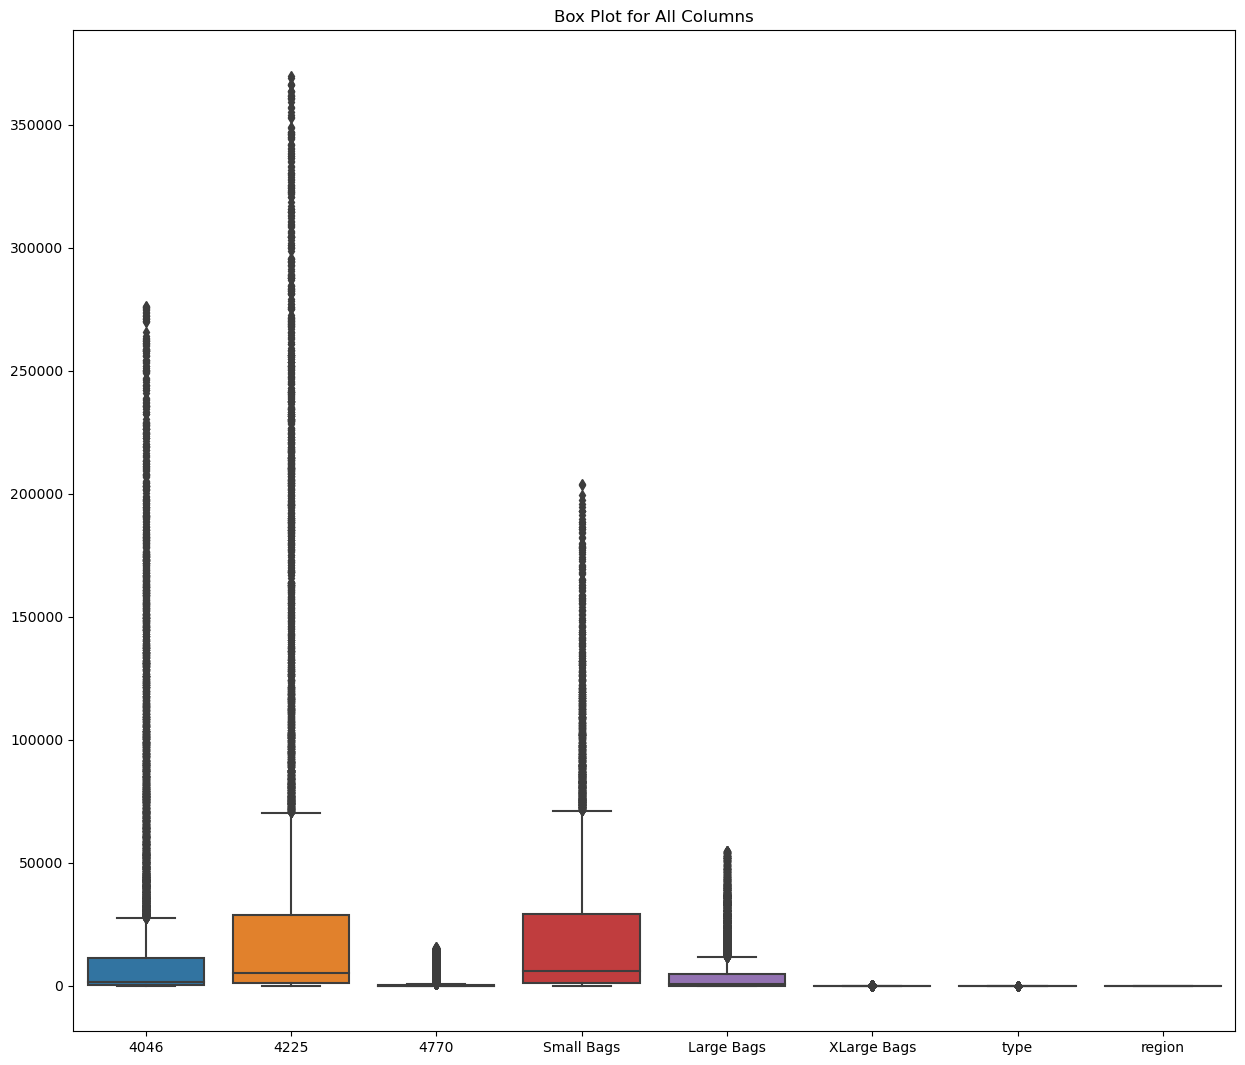

In [97]:
plt.figure(figsize=(15, 13))
sns.boxplot(data=data_copy2)
plt.title('Box Plot for All Columns')
plt.show()

##### now it is better

In [98]:
data_copy2.skew()

4046           3.256634
4225           3.346407
4770           3.815776
Small Bags     2.156517
Large Bags     2.703967
XLarge Bags    6.117440
type          -1.170526
region        -0.035609
dtype: float64

In [99]:
data_copy2['4046'] = np.cbrt(data_copy2['4046'])
data_copy2['4225'] = np.cbrt(data_copy2['4225'])
data_copy2['4770'] = np.cbrt(data_copy2['4770'])
data_copy2['Small Bags'] = np.cbrt(data_copy2['Small Bags'])
data_copy2['Large Bags'] = np.cbrt(data_copy2['Large Bags'])
data_copy2['XLarge Bags'] = np.cbrt(data_copy2['XLarge Bags'])

In [100]:
data_copy2.skew()

4046           1.289662
4225           1.022663
4770           1.605246
Small Bags     0.576056
Large Bags     0.793000
XLarge Bags    3.586844
type          -1.170526
region        -0.035609
dtype: float64

<AxesSubplot:>

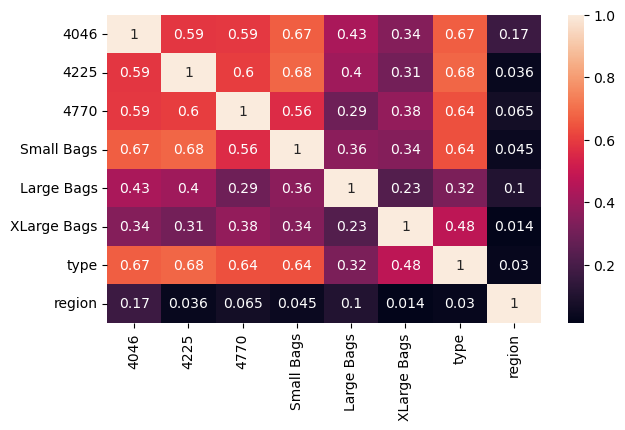

In [101]:
plt.figure(figsize=(7,4))

sns.heatmap(data_copy2.corr().abs(), annot=True)

##### region does not have a very good correlation with any column. 
##### I don't see multicollinearity in this, so we will create the model directly.

# Model bulding for region

In [102]:
## Dividing dependent and independent variable
x_r = data_copy2.drop('region',axis = 1)
y_r = data_copy2['region']


In [103]:
## scaled independent variable to normalizes the data
scalar = StandardScaler() 
x_scaled2 = scalar.fit_transform(x_r)


In [104]:
y_r.value_counts()

47.0    337
3.0     326
49.0    309
34.0    307
0.0     304
48.0    302
38.0    295
39.0    295
5.0     295
17.0    292
16.0    291
32.0    282
20.0    278
21.0    261
26.0    257
31.0    255
30.0    250
23.0    248
27.0    248
50.0    241
10.0    240
40.0    236
44.0    236
37.0    224
14.0    224
19.0    223
7.0     222
4.0     205
43.0    204
24.0    194
1.0     188
13.0    188
41.0    184
36.0    183
9.0     178
2.0     173
42.0    170
45.0    169
22.0    169
35.0    169
33.0    169
28.0    169
8.0     169
18.0    169
11.0    169
6.0     169
12.0    168
46.0    168
53.0    165
25.0    164
29.0    159
15.0    147
52.0     89
51.0     21
Name: region, dtype: int64

#### data is balanced

In [105]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_scaled2,y_r,test_size = 0.25, random_state= 81)

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

def metric_score2(clf,x_train2,x_test2,y_train2,y_test2, train=True):
    if train:
        y_pred = clf.predict(x_train2)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y_train2, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test2)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y_test2, pred) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y_test2, pred,digits=2))

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### DecisionTreeClassifier

In [108]:
# Training and initiation name to modal
dtc2 = DecisionTreeClassifier()
dtc2.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [109]:
# Call the function and pass dataset to check train and test score
metric_score2(dtc2,x_train2,x_test2,y_train2,y_test2, train=True)        
metric_score2(dtc2,x_train2,x_test2,y_train2,y_test2, train=False)     


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  73.00%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        66
         1.0       0.62      0.56      0.59        45
         2.0       0.76      0.88      0.81        42
         3.0       0.82      0.75      0.78        92
         4.0       0.75      0.77      0.76        52
         5.0       0.67      0.68      0.67        81
         6.0       0.96      1.00      0.98        49
         7.0       0.81      0.81      0.81        57
         8.0       0.92      0.83      0.87        41
         9.0       0.70      0.69      0.69        48
        10.0       0.70      0.59      0.64        64
        11.0       0.93      0.82      0.87        33
        12.0       0.84      0.67      0.75        46
        13.0       0.62      0.72     

### RandomForestClassifier

In [110]:
rfc2 = RandomForestClassifier()
rfc2.fit(x_train2,y_train2)

RandomForestClassifier()

In [111]:
metric_score2(rfc2,x_train2,x_test2,y_train2,y_test2, train=True)        
metric_score2(rfc2,x_train2,x_test2,y_train2,y_test2, train=False)     


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  83.21%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        66
         1.0       0.69      0.73      0.71        45
         2.0       0.89      0.95      0.92        42
         3.0       0.87      0.80      0.84        92
         4.0       0.85      0.90      0.88        52
         5.0       0.86      0.74      0.79        81
         6.0       1.00      1.00      1.00        49
         7.0       0.95      0.91      0.93        57
         8.0       0.97      0.85      0.91        41
         9.0       0.88      0.75      0.81        48
        10.0       0.74      0.72      0.73        64
        11.0       0.91      0.88      0.89        33
        12.0       0.89      0.85      0.87        46
        13.0       0.70      0.70     

### KNeighborsClassifier

In [112]:
knn2 = KNeighborsClassifier()
knn2.fit(x_train2,y_train2)

KNeighborsClassifier()

In [113]:
metric_score2(knn2,x_train2,x_test2,y_train2,y_test2, train=True)        
metric_score2(knn2,x_train2,x_test2,y_train2,y_test2, train=False)     


========================Train Result======================

Accuracy Score:  85.91%

========================Test Result==========================
Accuracy Score:  78.11%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.77      0.89      0.83        66
         1.0       0.64      0.67      0.65        45
         2.0       0.88      0.90      0.89        42
         3.0       0.84      0.71      0.77        92
         4.0       0.83      0.87      0.85        52
         5.0       0.81      0.68      0.74        81
         6.0       0.94      0.98      0.96        49
         7.0       0.71      0.84      0.77        57
         8.0       0.88      0.90      0.89        41
         9.0       0.63      0.65      0.64        48
        10.0       0.66      0.66      0.66        64
        11.0       0.76      0.85      0.80        33
        12.0       0.92      0.78      0.85        46
        13.0       0.60      0.63      

#### RandomForestClassifier result is best

### Hyperparameter tuning:

In [114]:
param_g2 = {'criterion': ['gini', 'entropy'],
           'n_estimators': [5,8],
           'max_depth': [None, 5,10],
           'min_samples_split': [2, 5],
           'min_samples_leaf': [1, 2]}

In [115]:
grid_search2 = GridSearchCV(estimator=rfc2, param_grid=param_g2, cv=5, scoring='accuracy')

In [116]:
grid_search2.fit(x_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [5, 8]},
             scoring='accuracy')

In [130]:
grid_search.best_score_

-0.04731720117012691

In [129]:
best_params = grid_search2.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 8}

In [131]:
rfc2_hpt = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=2,min_samples_split=2,n_estimators=8)
rfc2_hpt.fit(x_train2,y_train2)


RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=8)

In [133]:
# Call the function and pass dataset to check train and test score
metric_score2(rfc2_hpt,x_train2,x_test2,y_train2,y_test2, train=True)       
metric_score2(rfc2_hpt,x_train2,x_test2,y_train2,y_test2, train=False)       


========================Train Result======================

Accuracy Score:  95.95%

========================Test Result==========================
Accuracy Score:  78.89%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.75      0.88      0.81        66
         1.0       0.65      0.62      0.64        45
         2.0       0.82      0.88      0.85        42
         3.0       0.82      0.74      0.78        92
         4.0       0.79      0.85      0.81        52
         5.0       0.86      0.67      0.75        81
         6.0       1.00      0.94      0.97        49
         7.0       0.86      0.88      0.87        57
         8.0       0.92      0.80      0.86        41
         9.0       0.73      0.69      0.71        48
        10.0       0.74      0.66      0.69        64
        11.0       0.85      0.85      0.85        33
        12.0       0.88      0.80      0.84        46
        13.0       0.72      0.65      

##### The result of rfc2 was better, so we will make our model from it.

In [135]:
pickle.dump(rfc2,open('region','wb'))